In [25]:
# Importing the required packages 
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
import matplotlib.pyplot as plt

In [23]:
# Function importing Dataset 
def importdata(): 
    balance_data = pd.read_csv( 
'https://archive.ics.uci.edu/ml/machine-learning-'+
'databases/balance-scale/balance-scale.data', 
    sep= ',', header = None) 
      
    # Printing the dataswet shape 
    #print ("Dataset Length: ", len(balance_data)) 
    #print ("Dataset Shape: ", balance_data.shape) 
      
    # Printing the dataset obseravtions 
    #print ("Dataset: ",balance_data.head()) 
    return balance_data 

In [3]:
importdata()

Dataset Length:  625
Dataset Shape:  (625, 5)
Dataset:     0  1  2  3  4
0  B  1  1  1  1
1  R  1  1  1  2
2  R  1  1  1  3
3  R  1  1  1  4
4  R  1  1  1  5


,0,1,2,3,4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5
...,...,...,...,...,...
620,L,5,5,5,1
621,L,5,5,5,2
622,L,5,5,5,3
623,L,5,5,5,4


In [65]:
# Function to split the dataset 
def splitdataset(balance_data): 
  
    # Seperating the target variable 
    X = balance_data.values[:, 1:5] 
    Y = balance_data.values[:, 0] 
  
    # Spliting the dataset into train and test 
    X_train, X_test, y_train, y_test = train_test_split(  
    X, Y, test_size = 0.3, random_state = 100) 
      
    return X, Y, X_train, X_test, y_train, y_test

In [40]:
# Function to perform training with giniIndex. 
def train_using_gini(X_train, X_test, y_train, index): 
  
    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=1+index, min_samples_leaf=5) 
    # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini 
  

In [41]:
# Function to perform training with entropy. 
def train_using_entropy(X_train, X_test, y_train, index): 
  
    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 1+index, min_samples_leaf = 5) 
  
    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy 

In [42]:
# Function to make predictions 
def prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    #print("Predicted values:") 
    #print(y_pred) 
    return y_pred 

In [43]:
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
      
    #print("Confusion Matrix: ", 
        #confusion_matrix(y_test, y_pred)) 
      
    #print ("Accuracy : ", 
    return accuracy_score(y_test,y_pred)*100
      
    #print("Report : ", 
    #classification_report(y_test, y_pred)) 
  

In [62]:
# Driver code 
def main(): 
    results_gini = []
    results_entropy = []
    iteration = []
    # Building Phase 
    data = importdata() 
    for i in range(5):
        X, Y, X_train, X_test, y_train, y_test = splitdataset(data) 
        clf_gini = train_using_gini(X_train, X_test, y_train, i) 
        clf_entropy = train_using_entropy(X_train, X_test, y_train, i) 

    # Operational Phase 
    #print("Results Using Gini Index:") 
      
    # Prediction using gini 
        y_pred_gini = prediction(X_test, clf_gini) 
        results_gini.append(cal_accuracy(y_test, y_pred_gini))
      
    #print("Results Using Entropy:") 
    # Prediction using entropy 
        y_pred_entropy = prediction(X_test, clf_entropy) 
        results_entropy.append(cal_accuracy(y_test, y_pred_entropy))
        iteration.append(i+1)
    
    plt.scatter(x=results_entropy, y=iteration, alpha = 0.5, color='red')
    plt.scatter(x=results_gini, y=iteration, alpha = 0.5)
    plt.xlabel('Accuracy')
    plt.ylabel('depth')

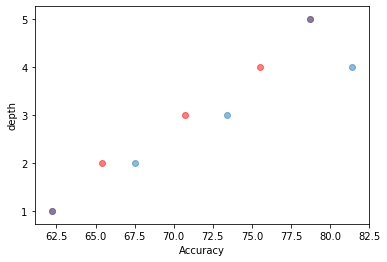

In [63]:
# Calling main function 
if __name__=="__main__": 
    main() 